In [1]:
# import sys
# sys.path.insert(0, r"/Users/cowboy/GitHub/geosaurus/src")

# Data Visualization - Construction permits, part 1/2

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1">Overview</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-2">Explore the data</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2.1">Data Exploration</a></span></li></ul></li><li><span><a href="#Permits-by-Status" data-toc-modified-id="Permits-by-Status-3">Permits by Status</a></span></li><li><span><a href="#Permits-by-Type" data-toc-modified-id="Permits-by-Type-4">Permits by Type</a></span><ul class="toc-item"><li><span><a href="#Clean-up-the-data" data-toc-modified-id="Clean-up-the-data-4.1">Clean up the data</a></span></li><li><span><a href="#Filter-the-permits" data-toc-modified-id="Filter-the-permits-4.2">Filter the permits</a></span></li><li><span><a href="#Visualize-filtered-dataset" data-toc-modified-id="Visualize-filtered-dataset-4.3">Visualize filtered dataset</a></span></li></ul></li><li><span><a href="#Visualize-temporal-and-spatial-trends" data-toc-modified-id="Visualize-temporal-and-spatial-trends-5">Visualize temporal and spatial trends</a></span><ul class="toc-item"><li><span><a href="#Visualize-permits-by-time-of-issue" data-toc-modified-id="Visualize-permits-by-time-of-issue-5.1">Visualize permits by time of issue</a></span></li></ul></li></ul></div>

## Overview

One indicator of a region's growth is the number of permits issued for new construction. Exploring and analyzing permit activity can help regional planners ensure that development occurs in accordance to the area's long-term goals. One area that has recently experienced rapid growth is Montgomery County, Maryland, a suburban county near Washington, D.C. County planners want to observe spatial and temporal growth trends, find out why certain areas are growing faster than others, and communicate key information about the county's growth to the public.

In this notebook, you'll explore Montgomery County permit data. First, you'll add the permit data from ArcGIS Living Atlas of the World. You'll explore the data and become familiar with exactly what kind of information it contains. Then, you'll analyze the data to detect patterns and find out why growth is occurring. Once you've gathered your findings from your exploration and analysis, you'll share your work online.

## Explore the data

To better understand trends in permit activity in Montgomery County, you'll add a dataset of permits issued since 2010. Before you begin your analysis, however, it's important to explore your data and understand what it shows and does not show. You'll familiarize yourself with the data's attributes, sort the data by type, and visualize spatial and temporal trends. In doing so, you'll gain context for your analysis and know exactly which questions you still need to ask to find out why, where, and when growth is occurring.

Connect to your ArcGIS online organization.

In [2]:
from arcgis.gis import GIS
import pandas as pd

from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [3]:
agol_gis = GIS()

Search for the **Commercial Permits since 2010** layer. You can specify the owner's name to get more specific results. To search for content from the Living Atlas, or content shared by other users on ArcGIS Online, set `outside_org=True`.

In [4]:
data = agol_gis.content.search('title: Commercial Permits since 2010', 'Feature layer', 
                               outside_org=True)
data[0]

<Item title:"Commercial Permits Since 2010" type:Feature Layer Collection owner:rbohnert>

Get the first item from the results.

In [5]:
permits = data[0]

Since the item is a Feature Layer Collection, accessing the layers property gives us a list of FeatureLayer objects. The permit layer is the first layer in this item. Visualize this layer on a map of Montgomery County, Maryland.

In [6]:
permit_layer = permits.layers[0]

In [7]:
permit_map = agol_gis.map('Montgomery County, Maryland', zoomlevel=9)
permit_map

MapView(layout=Layout(height='400px', width='100%'))

You can add a number of different layer objects such as FeatureLayer, FeatureCollection, ImageryLayer, MapImageLayer to the map by calling the `add_layer()` method.

In [8]:
permit_map.add_layer(permit_layer)

### Data Exploration

Now that you've added the permit data, you'll explore its contents. Geographic data doesn't only contain information about location; it can also include other attributes not seen on a map. 

Convert the layer into a spatially-enabled dataframe to explore these attributes.

In [9]:
permit_layer

<FeatureLayer url:"https://services8.arcgis.com/gNrBvIUXaCagAxJ2/arcgis/rest/services/Commercial_Permits_Since_2010_q9lDty/FeatureServer/0">

In [10]:
sdf = pd.DataFrame.spatial.from_layer(permit_layer)

`tail()` method gives the last 5 rows of the dataframe.

In [11]:
sdf.tail()

,SHAPE,added_date,address,applicatio,bldgareanu,building_a,city,dayofmonth_added_date,dayofmonth_final_date,dayofmonth_issue_date,...,second_final_date,second_issue_date,state,status,use_code,work_type,year_added_date,year_final_date,year_issue_date,zip_code
7507,"{""x"": -77.19663, ""y"": 39.104148, ""spatialRefer...",2014-01-02,9609 MEDICAL CENTER DR,COMMERCIAL BUILDING,2069.43,2069.43,ROCKVILLE,2,<NA>,27,...,<NA>,0,MD,Stop Work,BUSINESS BUILDING,ADD,2014,<NA>,2015,20850
7508,"{""x"": -77.027461, ""y"": 38.999474, ""spatialRefe...",2014-01-31,1015 SPRING ST,COMMERCIAL BUILDING,707.91,707.91,SILVER SPRING,31,25,18,...,0,0,MD,Stop Work,BUSINESS BUILDING,ADD,2014,2014,2014,20910
7509,"{""x"": -77.201951, ""y"": 39.285193, ""spatialRefe...",2014-02-11,26100 WOODFIELD RD,COMMERCIAL BUILDING,0.0,0.0,DAMASCUS,11,<NA>,13,...,<NA>,0,MD,Stop Work,BUSINESS BUILDING,CONSTRUCT,2014,<NA>,2014,20872
7510,"{""x"": -77.17405, ""y"": 38.999234, ""spatialRefer...",2014-03-06,8500 RIVER RD,COMMERCIAL BUILDING,472.02,472.02,BETHESDA,6,<NA>,11,...,<NA>,0,MD,Stop Work,COMMERCIAL MISCELLANEOUS STRUC,CONSTRUCT,2014,<NA>,2014,20817
7511,"{""x"": -77.17405, ""y"": 38.999234, ""spatialRefer...",2014-03-10,8500 RIVER RD,COMMERCIAL BUILDING,8461.55,8461.55,BETHESDA,10,<NA>,11,...,<NA>,0,MD,Stop Work,COMMERCIAL MISCELLANEOUS STRUC,CONSTRUCT,2014,<NA>,2014,20817


The permit data contains a long list of attributes. Some attributes have self-explanatory names, while others may have names that can be difficult to understand without context. The list of attributes can be obtained using the columns of the dataframe.

In [12]:
sdf.columns

Index(['SHAPE', 'added_date', 'address', 'applicatio', 'bldgareanu',
       'building_a', 'city', 'dayofmonth_added_date', 'dayofmonth_final_date',
       'dayofmonth_issue_date', 'dayofweek_added_date', 'dayofweek_final_date',
       'dayofweek_issue_date', 'declared_v', 'declvalnu', 'descriptio', 'fid',
       'final_date', 'hour_added_date', 'hour_final_date', 'hour_issue_date',
       'issue_date', 'latitude', 'location', 'longitude', 'minute_added_date',
       'minute_final_date', 'minute_issue_date', 'month_added_date',
       'month_final_date', 'month_issue_date', 'objectid', 'permit_num',
       'quarter_added_date', 'quarter_final_date', 'quarter_issue_date',
       'rowid', 'second_added_date', 'second_final_date', 'second_issue_date',
       'state', 'status', 'use_code', 'work_type', 'year_added_date',
       'year_final_date', 'year_issue_date', 'zip_code'],
      dtype='object')

In [13]:
sdf.describe().T

,count,mean,std,min,25%,50%,75%,max
bldgareanu,7512.0,8693.800270,4.104171e+04,0.000000,120.168000,1379.000000,4186.500000,1.548205e+06
building_a,7512.0,8693.800270,4.104171e+04,0.000000,120.168000,1379.000000,4186.500000,1.548205e+06
dayofmonth_added_date,7512.0,15.883253,8.567638e+00,1.000000,9.000000,16.000000,23.000000,3.100000e+01
dayofmonth_final_date,3890.0,15.574550,8.892878e+00,1.000000,8.000000,16.000000,23.000000,3.100000e+01
dayofmonth_issue_date,7054.0,15.953360,8.813776e+00,1.000000,8.000000,16.000000,23.000000,3.100000e+01
dayofweek_added_date,7512.0,3.087593,1.403647e+00,0.000000,2.000000,3.000000,4.000000,6.000000e+00
dayofweek_final_date,3890.0,3.028021,1.496026e+00,0.000000,2.000000,3.000000,4.000000,6.000000e+00
dayofweek_issue_date,7054.0,3.107315,1.370517e+00,1.000000,2.000000,3.000000,4.000000,6.000000e+00
declared_v,7512.0,551598.996733,3.562008e+06,0.000000,20000.000000,57465.000000,164175.000000,8.500000e+07
declvalnu,7512.0,551598.996733,3.562008e+06,0.000000,20000.000000,57465.000000,164175.000000,8.500000e+07


Query the types of attributes and explore the data.

In [14]:
sdf.dtypes

SHAPE                          geometry
added_date               datetime64[ns]
address                          string
applicatio                       string
bldgareanu                      Float64
building_a                      Float64
city                             string
dayofmonth_added_date             Int32
dayofmonth_final_date             Int32
dayofmonth_issue_date             Int32
dayofweek_added_date              Int32
dayofweek_final_date              Int32
dayofweek_issue_date              Int32
declared_v                      Float64
declvalnu                       Float64
descriptio                       string
fid                               Int32
final_date               datetime64[ns]
hour_added_date                   Int32
hour_final_date                   Int32
hour_issue_date                   Int32
issue_date               datetime64[ns]
latitude                        Float64
location                         string
longitude                       Float64


In [15]:
sdf['work_type'].unique()

<StringArray>
[                 'CONSTRUCT',                      'ALTER',
   'COMMERCIAL CHANGE OF USE',    'RESTORE AND / OR REPAIR',
                        'ADD',           'BUILD FOUNDATION',
                    'INSTALL',                    'REPLACE',
 'CONSTRUCT SHEETING/SHORING',              'FINAL ONLY AP']
Length: 10, dtype: string

In [16]:
sdf['status'].unique()

<StringArray>
['Finaled', 'Issued', 'Open', 'Stop Work']
Length: 4, dtype: string

In [17]:
sdf['use_code'].unique()

<StringArray>
[         'MULTI-FAMILY DWELLING',              'BUSINESS BUILDING',
            'MERCANTILE BUILDING', 'COMMERCIAL MISCELLANEOUS STRUC']
Length: 4, dtype: string

## Permits by Status

The `groupby()` method groups the rows per the column and does calculations, such as finding their counts, as shown in the following code.

In [18]:
permits_by_status = sdf.groupby(sdf['status']).size()
permits_by_status

status
Finaled      3860
Issued       2997
Open          455
Stop Work     200
dtype: int64

 There are only four permit statuses: Issued, Finaled, Open, and Stop Work. To visualize the number of permits for each status, you'll create a pie chart.

Since the dataframe attributes just show the count of status, you can consider any attribute to graph the status count.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

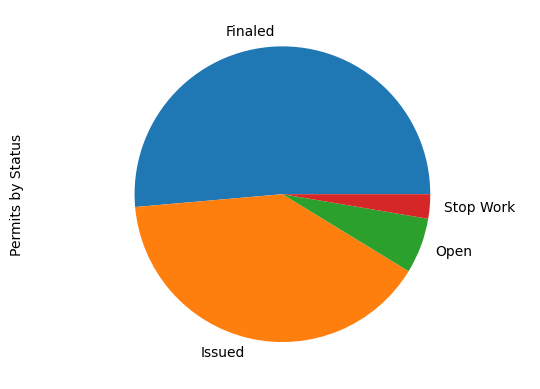

In [20]:
plt.axis('equal') 
permits_by_status.plot(kind='pie', legend=False, label='Permits by Status');

The pie chart above shows the four permit statuses, with the size of each status determined by the number of permits. The vast majority of permits are either Issued or Finaled. Finaled permits are issued permits that have also had the requisite inspections performed.

It's helpful to visualize the spatial distribution of permit attributes on a map. You'll change the map so that each permit's symbol represents its status.

In [21]:
permits_by_status_map = agol_gis.map('Montgomery County, Maryland')
permits_by_status_map

MapView(layout=Layout(height='400px', width='100%'))

![](insights_images/image_6.png)

In [22]:
sdf.spatial.plot(kind='map', map_widget=permits_by_status_map,
        renderer_type='u', # specify the unique value renderer using its notation 'u'
        col='status')  # column to get unique values from

ValueError: StringArray requires a sequence of strings or pandas.NA

## Permits by Type

In [23]:
permits_by_type = sdf.groupby(['use_code']).size()
permits_by_type

use_code
BUSINESS BUILDING                 3461
COMMERCIAL MISCELLANEOUS STRUC    1197
MERCANTILE BUILDING               1016
MULTI-FAMILY DWELLING             1838
dtype: int64

The series is not sorted properly. Use the `sort()` method to sort it from highest count to lowest count. The most common use code, **Business Buildings**, has almost twice as many permits as the second highest, **Multi-family Dwelling**. The top four use codes together comprise the majority of all permits, so these use codes may be the most important to focus on in your analysis later.

In [24]:
permits_by_type.sort_values(ascending=False, inplace=True)
permits_by_type.head()

use_code
BUSINESS BUILDING                 3461
MULTI-FAMILY DWELLING             1838
COMMERCIAL MISCELLANEOUS STRUC    1197
MERCANTILE BUILDING               1016
dtype: int64

### Clean up the data

Before you begin analysis of your data, you'll hide attribute fields you don't intend to use, rename fields with unclear names, and filter your dataset to only show permits with the four most common use codes. These changes won't permanently affect the original dataset, but they will make the data easier to work with and understand.

**'Declared_V'**, **'Building_A'**, **'Applicatio'** attribute fields describe aspects of the data that aren't important for your analysis. You'll drop these fields.

In [25]:
sdf.drop(['declared_v', 'building_a', 'applicatio'], axis=1, inplace=True)

In [26]:
sdf.columns

Index(['SHAPE', 'added_date', 'address', 'bldgareanu', 'city',
       'dayofmonth_added_date', 'dayofmonth_final_date',
       'dayofmonth_issue_date', 'dayofweek_added_date', 'dayofweek_final_date',
       'dayofweek_issue_date', 'declvalnu', 'descriptio', 'fid', 'final_date',
       'hour_added_date', 'hour_final_date', 'hour_issue_date', 'issue_date',
       'latitude', 'location', 'longitude', 'minute_added_date',
       'minute_final_date', 'minute_issue_date', 'month_added_date',
       'month_final_date', 'month_issue_date', 'objectid', 'permit_num',
       'quarter_added_date', 'quarter_final_date', 'quarter_issue_date',
       'rowid', 'second_added_date', 'second_final_date', 'second_issue_date',
       'state', 'status', 'use_code', 'work_type', 'year_added_date',
       'year_final_date', 'year_issue_date', 'zip_code'],
      dtype='object')

The fields are no longer listed. 

Next, you'll rename some of the attribute fields with shortened or unclear names so that their names are more descriptive.

In [27]:
sdf.rename(columns={"descriptio": "Description", "bldgareanu": "Building_Area", "declvalnu": "Declared_Value"}, inplace=True)

In [28]:
sdf.columns

Index(['SHAPE', 'added_date', 'address', 'Building_Area', 'city',
       'dayofmonth_added_date', 'dayofmonth_final_date',
       'dayofmonth_issue_date', 'dayofweek_added_date', 'dayofweek_final_date',
       'dayofweek_issue_date', 'Declared_Value', 'Description', 'fid',
       'final_date', 'hour_added_date', 'hour_final_date', 'hour_issue_date',
       'issue_date', 'latitude', 'location', 'longitude', 'minute_added_date',
       'minute_final_date', 'minute_issue_date', 'month_added_date',
       'month_final_date', 'month_issue_date', 'objectid', 'permit_num',
       'quarter_added_date', 'quarter_final_date', 'quarter_issue_date',
       'rowid', 'second_added_date', 'second_final_date', 'second_issue_date',
       'state', 'status', 'use_code', 'work_type', 'year_added_date',
       'year_final_date', 'year_issue_date', 'zip_code'],
      dtype='object')

There are other fields that you may want to either rename or remove, but for the purposes of this lesson, these are enough. 

### Filter the permits

Next, you'll filter the permits to reduce the number of records in your analysis. As you saw previously, there are four types of permits that comprise over half the total number of permits. Focusing your analysis on just these four types will reduce the amount of data to analyze without ignoring the most important types of development. To remove the other use codes, you'll create a filter.

In [29]:
permits_by_type.head(4) # top 4 Use_Codes

use_code
BUSINESS BUILDING                 3461
MULTI-FAMILY DWELLING             1838
COMMERCIAL MISCELLANEOUS STRUC    1197
MERCANTILE BUILDING               1016
dtype: int64

In [30]:
filtered_permits = list(permits_by_type.head(4).index)
filtered_permits

['BUSINESS BUILDING',
 'MULTI-FAMILY DWELLING',
 'COMMERCIAL MISCELLANEOUS STRUC',
 'MERCANTILE BUILDING']

To visualize the top 4 Use Codes on a map, you can filer the dataframe with Use_Code containing only the top 4 attribute value.

In [31]:
filtered_df = sdf.loc[sdf['use_code'].isin(filtered_permits)]

In [32]:
filtered_df.head()

,SHAPE,added_date,address,Building_Area,city,dayofmonth_added_date,dayofmonth_final_date,dayofmonth_issue_date,dayofweek_added_date,dayofweek_final_date,...,second_final_date,second_issue_date,state,status,use_code,work_type,year_added_date,year_final_date,year_issue_date,zip_code
0,"{""x"": -77.278324, ""y"": 39.178067, ""spatialRefe...",2010-01-07,13536 WATERFORD HILLS BLVD,1336.0,GERMANTOWN,7,13,8,4,2,...,0,0,MD,Finaled,MULTI-FAMILY DWELLING,CONSTRUCT,2010,2012,2011,20874
1,"{""x"": -77.27829, ""y"": 39.178056, ""spatialRefer...",2010-01-07,13538 WATERFORD HILLS BLVD,1730.0,GERMANTOWN,7,15,8,4,4,...,0,0,MD,Finaled,MULTI-FAMILY DWELLING,CONSTRUCT,2010,2012,2011,20874
2,"{""x"": -77.278256, ""y"": 39.178045, ""spatialRefe...",2010-01-07,13540 WATERFORD HILLS BLVD,1336.0,GERMANTOWN,7,15,8,4,4,...,0,0,MD,Finaled,MULTI-FAMILY DWELLING,CONSTRUCT,2010,2012,2011,20874
3,"{""x"": -77.278223, ""y"": 39.178035, ""spatialRefe...",2010-01-07,13542 WATERFORD HILLS BLVD,1730.0,GERMANTOWN,7,15,8,4,4,...,0,0,MD,Finaled,MULTI-FAMILY DWELLING,CONSTRUCT,2010,2012,2011,20874
4,"{""x"": -77.278189, ""y"": 39.178024, ""spatialRefe...",2010-01-07,13544 WATERFORD HILLS BLVD,1336.0,GERMANTOWN,7,15,8,4,4,...,0,0,MD,Finaled,MULTI-FAMILY DWELLING,CONSTRUCT,2010,2012,2011,20874


In [33]:
sdf.shape, filtered_df.shape

((7512, 45), (7512, 45))

The dataset is filtered. Instead of more than 11,000 permits, the filtered dataframe has about 7,500.

### Visualize filtered dataset

In [34]:
filtered_map = agol_gis.map('Montgomery County, Maryland')

In [35]:
filtered_map

MapView(layout=Layout(height='400px', width='100%'))

![](insights_images/image_7.png)

In [36]:
filtered_df.spatial.plot(kind='map', map_widget=filtered_map,
        renderer_type='u', # specify the unique value renderer using its notation 'u'
        col='use_code')  # column to get unique values from

ValueError: StringArray requires a sequence of strings or pandas.NA

## Visualize temporal and spatial trends

Your data show permits, but what do these permits say about when and where growth is happening in the county? Your data also contains temporal attribute fields, such as **Added_Date**, which indicates when a permit was first added to the system. The field has several values that break down the data by year, month, and even hour.

Split the **Added_date** to get year, month, week_of_day

In [37]:
sdf['datetime'] = pd.to_datetime(sdf['added_date'], unit='ms')
sdf['year'], sdf['month'], sdf['day_of_week'] = sdf.datetime.dt.year, sdf.datetime.dt.month, sdf.datetime.dt.dayofweek

### Visualize permits by time of issue
You'll create chart cards for the year, month, and day subfields to visualize patterns in permit activity over time.

In [ ]:
import seaborn as sns

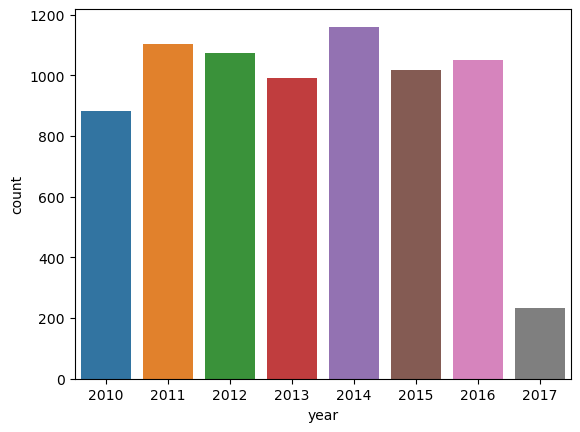

In [40]:
sns.countplot(x="year", data=sdf);

The chart shows the number of permits issued each year since 2010. (The year 2017 has significantly fewer permits because the dataset only covers part of 2017.) You can compare the number of permits visually by the size of each bar. Although some fluctuation occurs from year to year, most years had similar permit activity.

Similarly you can visualize it by month as well as day_of_week

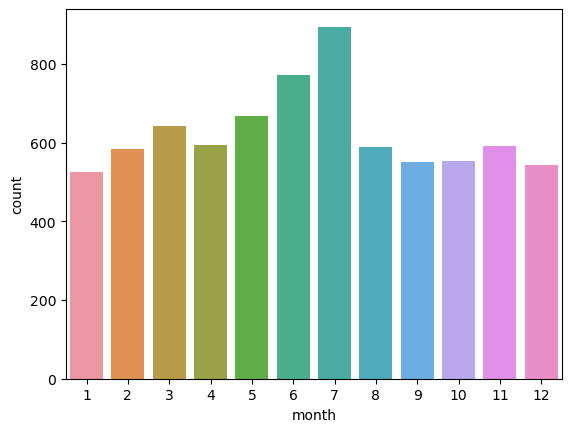

In [41]:
sns.countplot(x="month", data=sdf);

This bar chart changes to show the number of permits issued by month. Based on the chart, the highest permit activity occurs in June and July.

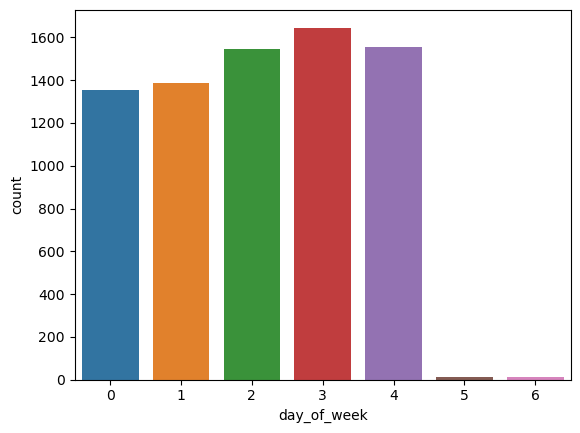

In [42]:
sns.countplot(x="day_of_week", data=sdf);

Almost all permit activity occurs on weekdays. Government offices are closed on weekends, so few permits are issued then.

In [43]:
ddf = sdf.set_index('datetime')

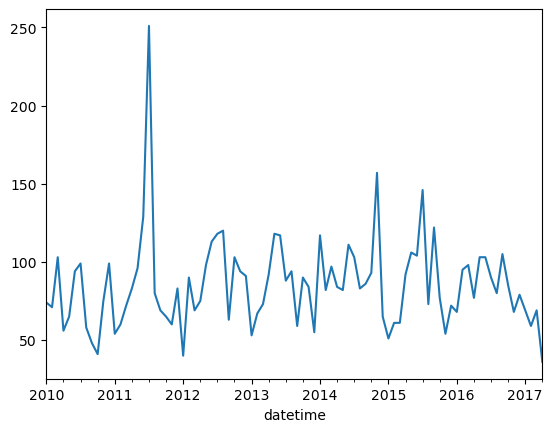

In [44]:
ddf['num'] = 1
ddf['num'].resample('M').sum().plot();

A huge spike in permit activity occurred in mid-2011. What caused this spike? Is it an increase in overall permit activity, or is it mostly an increase in a certain type of permit? You'll plot the number of permits based on Use_Code to find which one cased the spike.

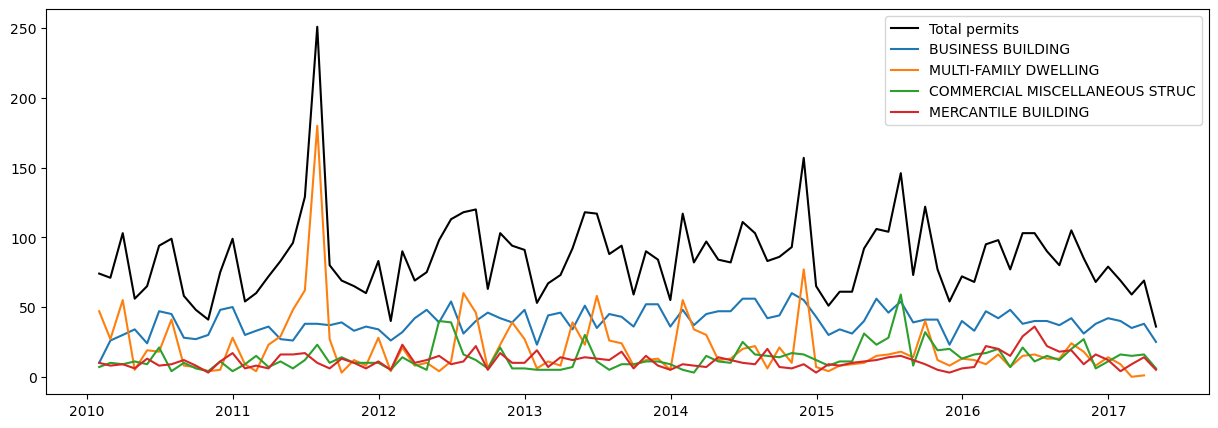

In [46]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(ddf['num'].resample('M').sum(), 'k', label='Total permits')
for use_code in filtered_permits:
    x = ddf[ddf.use_code == use_code]['num'].resample('M').sum()
    ax.plot(x, label=use_code)
ax.legend();

Based on the legend, permit activity spiked in 2011 due to a sharp increase in the number of multifamily dwelling permits issued. This likely means that there was large residential growth in 2011.

You've investigated some temporal patterns in your data. Next, you'll look at spatial patterns. Are there certain areas in the county that have experienced a relatively high degree of permit activity? Was the 2011 spike in residential permits in a specific location? To find out, you'll change the symbology of the map card to show hot spots, or areas with concentrations of points.

In [47]:
hotspot_map = agol_gis.map('Germantown, Montgomery County, Maryland')
hotspot_map

MapView(layout=Layout(height='400px', width='100%'))

In [48]:
sdf.spatial.plot(kind='map', map_widget=hotspot_map,
        renderer_type='h', 
        col='status') 

ValueError: StringArray requires a sequence of strings or pandas.NA

![](insights_images/hotspot.png)

The hot spots show up  where there is a high concentration of permits. The highest concentration areas are in the southeast and northwest corners of the county, which correspond to the major population centers of Germantown and the suburban communities near Washington, D.C.

Next, you'll see if the 2011 permit spike corresponds to a specific area of the map. The code below filters the dataframe to only show permits from 2011 and highlights related data in the map. In this case, the heat map changes to show the hot spot in the northwest part of the county, near Germantown.

In [49]:
hotspot_2011_map = agol_gis.map('Germantown, Montgomery County, Maryland')
hotspot_2011_map

MapView(layout=Layout(height='400px', width='100%'))

In [50]:
sdf[sdf.year==2011].spatial.plot(kind='map', map_widget=hotspot_2011_map,
        renderer_type='h',
        col='status')  # column to get unique values from

ValueError: StringArray requires a sequence of strings or pandas.NA

![](insights_images/filtered_hotspot.png)